# Ola

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

The data is monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

Demographics (city, age, gender etc.),
Tenure information (joining date, Last Date),
Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
!gdown 1oz4UFd33ghOsoqWT8EDZfbqbDvC67m9W

Downloading...
From: https://drive.google.com/uc?id=1oz4UFd33ghOsoqWT8EDZfbqbDvC67m9W
To: /content/ola_driver_scaler.csv
100% 1.13M/1.13M [00:00<00:00, 42.3MB/s]


In [ ]:
df=pd.read_csv('ola_driver_scaler.csv')

In [ ]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


There are three date column which is existing in string format. Hence we will convert it to datatime data.

In [ ]:
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])

df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])

df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [ ]:
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
df.describe(include='O')

,City
count,19104
unique,29
top,C20
freq,1008


In [ ]:
df.describe(include='all')

<ipython-input-12-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')
<ipython-input-12-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')
<ipython-input-12-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104,19104.000000,19043.000000,19052.000000,19104,19104.000000,19104.000000,19104,1616,19104.000000,19104.000000,1.910400e+04,19104.000000
unique,24,NaN,NaN,NaN,29,NaN,NaN,869,493,NaN,NaN,NaN,NaN
top,2019-01-01 00:00:00,NaN,NaN,NaN,C20,NaN,NaN,2015-07-23 00:00:00,2020-07-29 00:00:00,NaN,NaN,NaN,NaN
freq,1022,NaN,NaN,NaN,1008,NaN,NaN,192,70,NaN,NaN,NaN,NaN
first,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2013-04-01 00:00:00,2018-12-31 00:00:00,NaN,NaN,NaN,NaN
last,2020-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-28 00:00:00,2020-12-28 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,1415.591133,34.668435,0.418749,NaN,1.021671,65652.025126,NaN,NaN,1.690536,2.252670,5.716621e+05,2.008899
std,NaN,810.705321,6.257912,0.493367,NaN,0.800167,30914.515344,NaN,NaN,0.836984,1.026512,1.128312e+06,1.009832
min,NaN,1.000000,21.000000,0.000000,NaN,0.000000,10747.000000,NaN,NaN,1.000000,1.000000,-6.000000e+06,1.000000
25%,NaN,710.000000,30.000000,0.000000,NaN,0.000000,42383.000000,NaN,NaN,1.000000,1.000000,0.000000e+00,1.000000


In [ ]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1


In [ ]:
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [ ]:
df.isna().sum()/len(df)*100

MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

KNN Imputation

In [ ]:
df_num = df.select_dtypes(np.number)

In [ ]:
df_num.head()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,28.0,0.0,2,57387,1,1,2381060,2
1,1,28.0,0.0,2,57387,1,1,-665480,2
2,1,28.0,0.0,2,57387,1,1,0,2
3,2,31.0,0.0,2,67016,2,2,0,1
4,2,31.0,0.0,2,67016,2,2,0,1


In [ ]:
df_num.isna().sum()

Driver_ID                0
Age                     61
Gender                  52
Education_Level          0
Income                   0
Joining Designation      0
Grade                    0
Total Business Value     0
Quarterly Rating         0
dtype: int64

In [ ]:
df_num.drop('Driver_ID', axis=1, inplace=True)

In [ ]:
df_num.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,28.0,0.0,2,57387,1,1,2381060,2
1,28.0,0.0,2,57387,1,1,-665480,2
2,28.0,0.0,2,57387,1,1,0,2
3,31.0,0.0,2,67016,2,2,0,1
4,31.0,0.0,2,67016,2,2,0,1


In [ ]:
from sklearn.impute import KNNImputer

KI = KNNImputer(n_neighbors=5, weights='distance', metric='nan_euclidean')
df_num_new = pd.DataFrame(KI.fit_transform(df_num), columns=df_num.columns)

df_num_new.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0


In [ ]:
df_num_new.isna().sum()

Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64

In [ ]:
rem_columns = list(set(df.columns).difference(set(df_num_new.columns)))
rem_columns

['MMM-YY', 'Dateofjoining', 'Driver_ID', 'City', 'LastWorkingDate']

In [ ]:
df1 = pd.concat([df_num_new, df[rem_columns]], axis=1)
df1.head()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,MMM-YY,Dateofjoining,Driver_ID,City,LastWorkingDate
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,2019-01-01,2018-12-24,1,C23,NaT
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,2019-02-01,2018-12-24,1,C23,NaT
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,2019-03-01,2018-12-24,1,C23,2019-03-11
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-11-01,2020-11-06,2,C7,NaT
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-12-01,2020-11-06,2,C7,NaT


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Age                   19104 non-null  float64       
 1   Gender                19104 non-null  float64       
 2   Education_Level       19104 non-null  float64       
 3   Income                19104 non-null  float64       
 4   Joining Designation   19104 non-null  float64       
 5   Grade                 19104 non-null  float64       
 6   Total Business Value  19104 non-null  float64       
 7   Quarterly Rating      19104 non-null  float64       
 8   MMM-YY                19104 non-null  datetime64[ns]
 9   Dateofjoining         19104 non-null  datetime64[ns]
 10  Driver_ID             19104 non-null  int64         
 11  City                  19104 non-null  object        
 12  LastWorkingDate       1616 non-null   datetime64[ns]
dtypes: datetime64[ns

In [ ]:
#To check if operations has been performed right or not

df[df['Driver_ID']==2500]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
16947,2020-10-01,2500,32.0,0.0,C8,1,66536,2020-09-28,NaT,3,3,0,1
16948,2020-11-01,2500,32.0,0.0,C8,1,66536,2020-09-28,NaT,3,3,0,1
16949,2020-12-01,2500,32.0,0.0,C8,1,66536,2020-09-28,NaT,3,3,0,1


In [ ]:
df1[df1['Driver_ID']==2500]

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,MMM-YY,Dateofjoining,Driver_ID,City,LastWorkingDate
16947,32.0,0.0,1.0,66536.0,3.0,3.0,0.0,1.0,2020-10-01,2020-09-28,2500,C8,NaT
16948,32.0,0.0,1.0,66536.0,3.0,3.0,0.0,1.0,2020-11-01,2020-09-28,2500,C8,NaT
16949,32.0,0.0,1.0,66536.0,3.0,3.0,0.0,1.0,2020-12-01,2020-09-28,2500,C8,NaT


In [ ]:
df1.isna().sum()

Age                         0
Gender                      0
Education_Level             0
Income                      0
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
MMM-YY                      0
Dateofjoining               0
Driver_ID                   0
City                        0
LastWorkingDate         17488
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Age                   19104 non-null  float64       
 1   Gender                19104 non-null  float64       
 2   Education_Level       19104 non-null  float64       
 3   Income                19104 non-null  float64       
 4   Joining Designation   19104 non-null  float64       
 5   Grade                 19104 non-null  float64       
 6   Total Business Value  19104 non-null  float64       
 7   Quarterly Rating      19104 non-null  float64       
 8   MMM-YY                19104 non-null  datetime64[ns]
 9   Dateofjoining         19104 non-null  datetime64[ns]
 10  Driver_ID             19104 non-null  int64         
 11  City                  19104 non-null  object        
 12  LastWorkingDate       1616 non-null   datetime64[ns]
dtypes: datetime64[ns

Since there exist multiple rows for a single Driver_ID we will have to aggregate the rows logically.

In [ ]:
df1 = df1.sort_values(by=['Driver_ID', 'MMM-YY'])

In [ ]:
df1

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,MMM-YY,Dateofjoining,Driver_ID,City,LastWorkingDate
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,2019-01-01,2018-12-24,1,C23,NaT
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,2019-02-01,2018-12-24,1,C23,NaT
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,2019-03-01,2018-12-24,1,C23,2019-03-11
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-11-01,2020-11-06,2,C7,NaT
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-12-01,2020-11-06,2,C7,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0,2020-08-01,2020-06-08,2788,C27,NaT
19100,30.0,0.0,2.0,70254.0,2.0,2.0,448370.0,3.0,2020-09-01,2020-06-08,2788,C27,NaT
19101,30.0,0.0,2.0,70254.0,2.0,2.0,0.0,2.0,2020-10-01,2020-06-08,2788,C27,NaT
19102,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0,2020-11-01,2020-06-08,2788,C27,NaT


In [ ]:
df1['QR increased'] = df1.groupby('Driver_ID')['Quarterly Rating'].transform(lambda x: 1 if (x.iloc[-1]-x.iloc[0])>0 else 0)

In [ ]:
df1

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,MMM-YY,Dateofjoining,Driver_ID,City,LastWorkingDate,QR increased
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,2019-01-01,2018-12-24,1,C23,NaT,0
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,2019-02-01,2018-12-24,1,C23,NaT,0
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,2019-03-01,2018-12-24,1,C23,2019-03-11,0
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-11-01,2020-11-06,2,C7,NaT,0
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-12-01,2020-11-06,2,C7,NaT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0,2020-08-01,2020-06-08,2788,C27,NaT,1
19100,30.0,0.0,2.0,70254.0,2.0,2.0,448370.0,3.0,2020-09-01,2020-06-08,2788,C27,NaT,1
19101,30.0,0.0,2.0,70254.0,2.0,2.0,0.0,2.0,2020-10-01,2020-06-08,2788,C27,NaT,1
19102,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0,2020-11-01,2020-06-08,2788,C27,NaT,1


In [ ]:
df1['QR increased'].value_counts()

0    14648
1     4456
Name: QR increased, dtype: int64

In [ ]:
df1

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,MMM-YY,Dateofjoining,Driver_ID,City,LastWorkingDate,QR increased
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,2019-01-01,2018-12-24,1,C23,NaT,0
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,2019-02-01,2018-12-24,1,C23,NaT,0
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,2019-03-01,2018-12-24,1,C23,2019-03-11,0
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-11-01,2020-11-06,2,C7,NaT,0
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-12-01,2020-11-06,2,C7,NaT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0,2020-08-01,2020-06-08,2788,C27,NaT,1
19100,30.0,0.0,2.0,70254.0,2.0,2.0,448370.0,3.0,2020-09-01,2020-06-08,2788,C27,NaT,1
19101,30.0,0.0,2.0,70254.0,2.0,2.0,0.0,2.0,2020-10-01,2020-06-08,2788,C27,NaT,1
19102,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0,2020-11-01,2020-06-08,2788,C27,NaT,1


Creation of a column which indicates whether the driver's income has increased or not.

In [ ]:
df1['Income increased'] = df1.groupby('Driver_ID')['Income'].transform(lambda x: 1 if (x.iloc[-1]-x.iloc[0])>0 else 0)

In [ ]:
df1.groupby('Driver_ID')['Income'].apply(lambda x: 1 if (x.iloc[-1]-x.iloc[0])>0 else 0).value_counts()

0    2338
1      43
Name: Income, dtype: int64

In [ ]:
df1['joining_month']=df1['Dateofjoining'].dt.month

Incomes of only 43 drivers has had an increase during their tenure with Ola.

### Aggregating the rows at Driver_ID level

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19104 entries, 0 to 19103
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Age                   19104 non-null  float64       
 1   Gender                19104 non-null  float64       
 2   Education_Level       19104 non-null  float64       
 3   Income                19104 non-null  float64       
 4   Joining Designation   19104 non-null  float64       
 5   Grade                 19104 non-null  float64       
 6   Total Business Value  19104 non-null  float64       
 7   Quarterly Rating      19104 non-null  float64       
 8   MMM-YY                19104 non-null  datetime64[ns]
 9   Dateofjoining         19104 non-null  datetime64[ns]
 10  Driver_ID             19104 non-null  int64         
 11  City                  19104 non-null  object        
 12  LastWorkingDate       1616 non-null   datetime64[ns]
 13  QR increased    

In [ ]:
agg_dict={'Age':'max',
          'Gender':'last',
          'Education_Level':'last',
          'Income':'last',
          'Joining Designation':'last',
          'Grade':'last',
          'Total Business Value':'sum',
          'Quarterly Rating':'last',
          'LastWorkingDate':'last',
          'City':'last',
          'Dateofjoining':'last',
          'QR increased':'last',
          'Income increased':'last',
          'joining_month':'last'
}

In [ ]:
df2 = df1.groupby('Driver_ID').aggregate(agg_dict).reset_index()

In [ ]:
df2

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,LastWorkingDate,City,Dateofjoining,QR increased,Income increased,joining_month
0,1,28.0,0.0,2.0,57387.0,1.0,1.0,1715580.0,2.0,2019-03-11,C23,2018-12-24,0,0,12
1,2,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,NaT,C7,2020-11-06,0,0,11
2,4,43.0,0.0,2.0,65603.0,2.0,2.0,350000.0,1.0,2020-04-27,C13,2019-12-07,0,0,12
3,5,29.0,0.0,0.0,46368.0,1.0,1.0,120360.0,1.0,2019-03-07,C9,2019-01-09,0,0,1
4,6,31.0,1.0,1.0,78728.0,3.0,3.0,1265000.0,2.0,NaT,C11,2020-07-31,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,0.0,82815.0,2.0,3.0,21748820.0,4.0,NaT,C24,2015-10-15,1,0,10
2377,2785,34.0,1.0,0.0,12105.0,1.0,1.0,0.0,1.0,2020-10-28,C9,2020-08-28,0,0,8
2378,2786,45.0,0.0,0.0,35370.0,2.0,2.0,2815090.0,1.0,2019-09-22,C19,2018-07-31,0,0,7
2379,2787,28.0,1.0,2.0,69498.0,1.0,1.0,977830.0,1.0,2019-06-20,C20,2018-07-21,0,0,7


In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.000000,1400.0,2100.0,2788.0
Age,2381.0,3.374554e+01,5.947464e+00,21.0,29.135393,33.0,37.0,58.0
Gender,2381.0,4.101692e-01,4.916148e-01,0.0,0.000000,0.0,1.0,1.0
Education_Level,2381.0,1.007560e+00,8.162900e-01,0.0,0.000000,1.0,2.0,2.0
Income,2381.0,5.933416e+04,2.838367e+04,10747.0,39104.000000,55315.0,75986.0,188418.0
Joining Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.000000,2.0,2.0,5.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.000000,2.0,3.0,5.0
Total Business Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.000000,817680.0,4173650.0,95331060.0
Quarterly Rating,2381.0,1.427971e+00,8.098389e-01,1.0,1.000000,1.0,2.0,4.0
QR increased,2381.0,1.503570e-01,3.574961e-01,0.0,0.000000,0.0,0.0,1.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             2381 non-null   int64         
 1   Age                   2381 non-null   float64       
 2   Gender                2381 non-null   float64       
 3   Education_Level       2381 non-null   float64       
 4   Income                2381 non-null   float64       
 5   Joining Designation   2381 non-null   float64       
 6   Grade                 2381 non-null   float64       
 7   Total Business Value  2381 non-null   float64       
 8   Quarterly Rating      2381 non-null   float64       
 9   LastWorkingDate       1616 non-null   datetime64[ns]
 10  City                  2381 non-null   object        
 11  Dateofjoining         2381 non-null   datetime64[ns]
 12  QR increased          2381 non-null   int64         
 13  Income increased  

#Creating a target variable which indicates whether the driver has left or is still in service

If the last working day column is empty it indicates that the driver is still in service. If a date is available in this column it means that he already left the service.

In [ ]:
df2['target'] = df2['LastWorkingDate'].notnull().astype('int')

In [ ]:
df2['target'].value_counts()

1    1616
0     765
Name: target, dtype: int64

1616 drivers has left the service, whereas 765 drivers are still in service.

In [ ]:
#Percentage of drivers who left the organization

df2['target'].mean()*100

67.87064258714825

Around 68 percent of drivers has left the organization

In [ ]:
df2['Gender'] = df2['Gender'].round()

In [ ]:
df2['Gender'].value_counts(normalize=True)

0.0    0.589668
1.0    0.410332
Name: Gender, dtype: float64

In [ ]:
df2.describe(include='O')

,City
count,2381
unique,29
top,C20
freq,152


<Axes: >

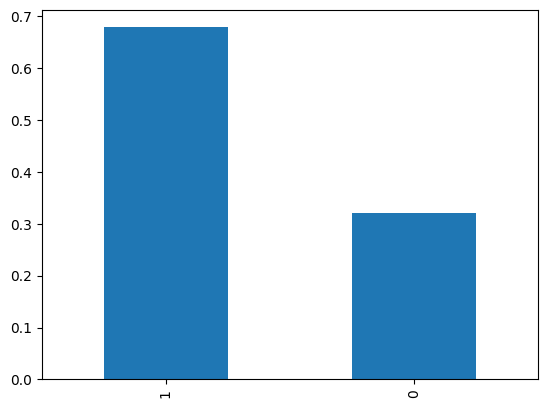

In [ ]:
df2['target'].value_counts(normalize=True).plot(kind='bar')

In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.000000,1400.0,2100.0,2788.0
Age,2381.0,3.374554e+01,5.947464e+00,21.0,29.135393,33.0,37.0,58.0
Gender,2381.0,4.103318e-01,4.919972e-01,0.0,0.000000,0.0,1.0,1.0
Education_Level,2381.0,1.007560e+00,8.162900e-01,0.0,0.000000,1.0,2.0,2.0
Income,2381.0,5.933416e+04,2.838367e+04,10747.0,39104.000000,55315.0,75986.0,188418.0
Joining Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.000000,2.0,2.0,5.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.000000,2.0,3.0,5.0
Total Business Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.000000,817680.0,4173650.0,95331060.0
Quarterly Rating,2381.0,1.427971e+00,8.098389e-01,1.0,1.000000,1.0,2.0,4.0
QR increased,2381.0,1.503570e-01,3.574961e-01,0.0,0.000000,0.0,0.0,1.0


In [ ]:
df2.describe(include='O')

,City
count,2381
unique,29
top,C20
freq,152


### Categorical features

In [ ]:
df2.columns

Index(['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'LastWorkingDate', 'City', 'Dateofjoining',
       'QR increased', 'Income increased', 'joining_month', 'target'],
      dtype='object')

In [ ]:
cat = ['Gender', 'Education_Level','Joining Designation', 'Grade','Quarterly Rating', 'City','QR increased', 'Income increased', 'target','joining_month']

for i in cat:
  print('Feature name: ', i)
  print(df2[i].value_counts())
  print('-'*50)

Feature name:  Gender
0.0    1404
1.0     977
Name: Gender, dtype: int64
--------------------------------------------------
Feature name:  Education_Level
2.0    802
1.0    795
0.0    784
Name: Education_Level, dtype: int64
--------------------------------------------------
Feature name:  Joining Designation
1.0    1026
2.0     815
3.0     493
4.0      36
5.0      11
Name: Joining Designation, dtype: int64
--------------------------------------------------
Feature name:  Grade
2.0    855
1.0    741
3.0    623
4.0    138
5.0     24
Name: Grade, dtype: int64
--------------------------------------------------
Feature name:  Quarterly Rating
1.0    1744
2.0     362
3.0     168
4.0     107
Name: Quarterly Rating, dtype: int64
--------------------------------------------------
Feature name:  City
C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C22     82
C3      82
C28     82
C12     81
C5      80
C1      80
C21     79
C14     79
C6      78
C4      77


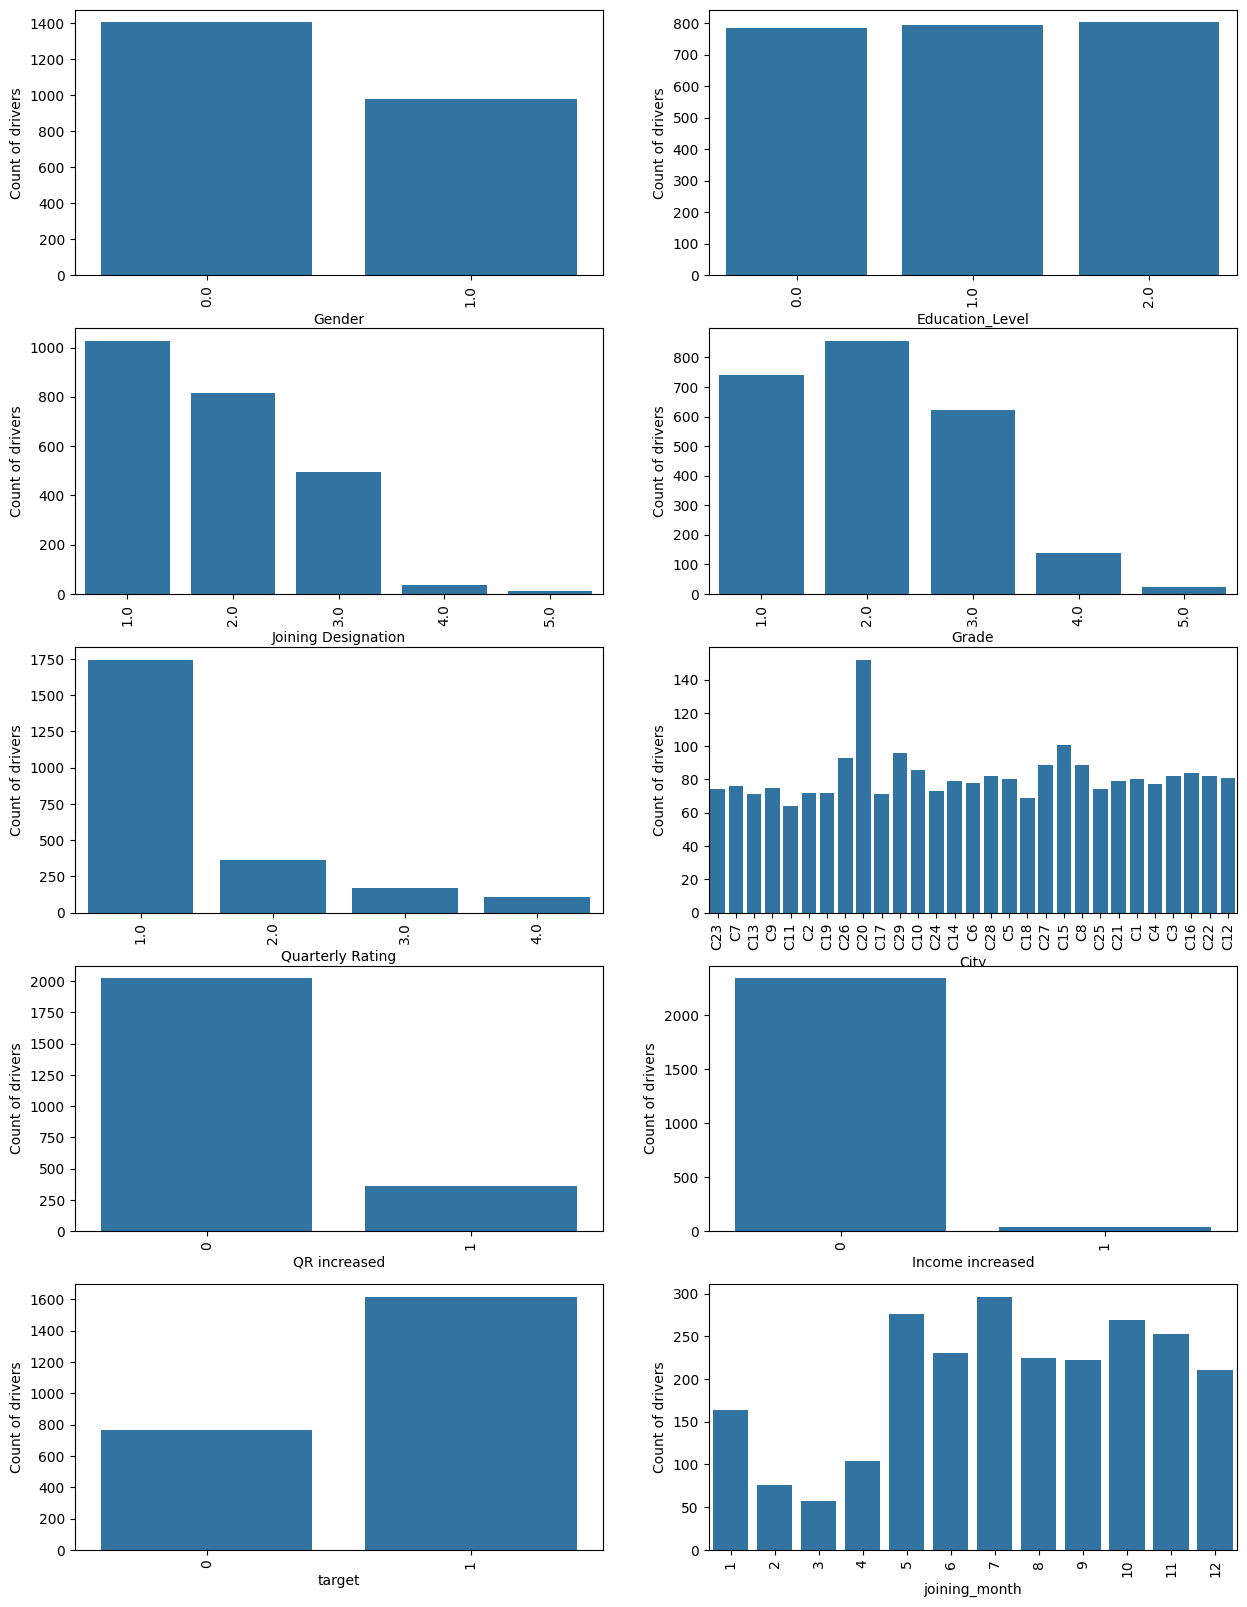

In [ ]:
plt.figure(figsize=(15,20))

i=1
for j in cat:
  plt.subplot(5,2,i)
  sns.countplot(data=df2, x=j)
  plt.xlabel(j)
  plt.ylabel('Count of drivers')
  plt.xticks(rotation=90)
  i+=1

plt.show()

## Numerical columns

In [ ]:
num = ['Age','Income','Total Business Value']

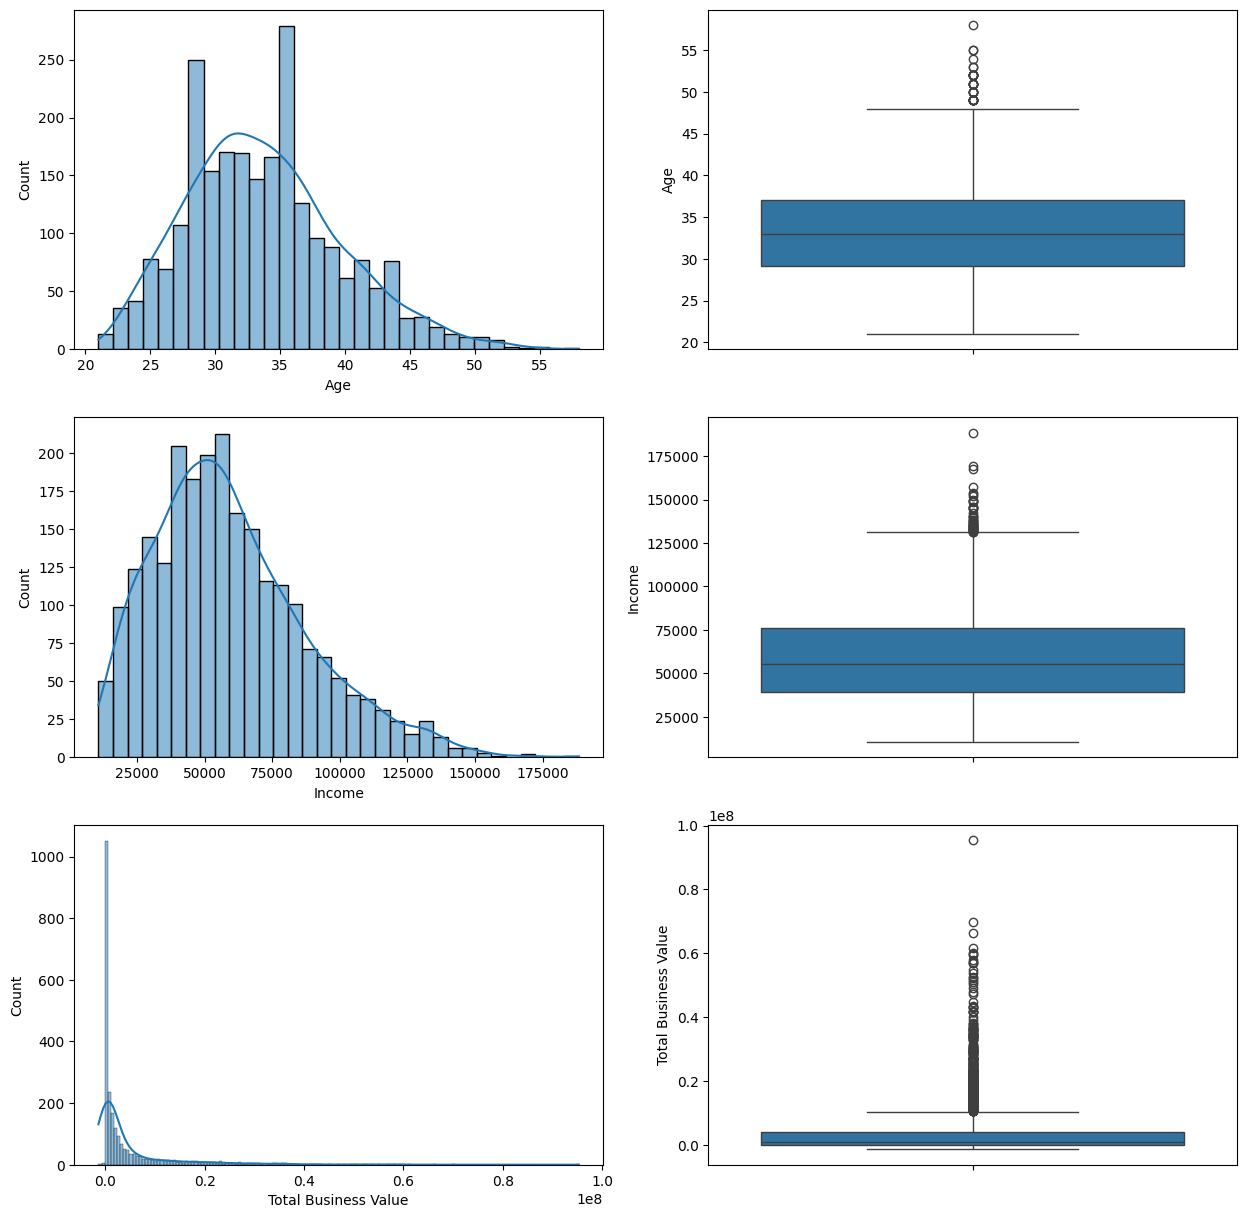

In [ ]:
plt.figure(figsize=(15,15))

i=1

for j in num:
  plt.subplot(3,2,i)
  sns.histplot(df2[j], kde=True)
  plt.xlabel(j)

  plt.subplot(3,2,i+1)
  sns.boxplot(data=df2, y=j)

  i+=2

plt.show()

There are outliers present in the numerical columns. All the plots are right skewed.

Checking the dependencies of categorical variables with target variable

In [ ]:
cat.remove('target')
cat

['Gender',
 'Education_Level',
 'Joining Designation',
 'Grade',
 'Quarterly Rating',
 'City',
 'QR increased',
 'Income increased',
 'joining_month']

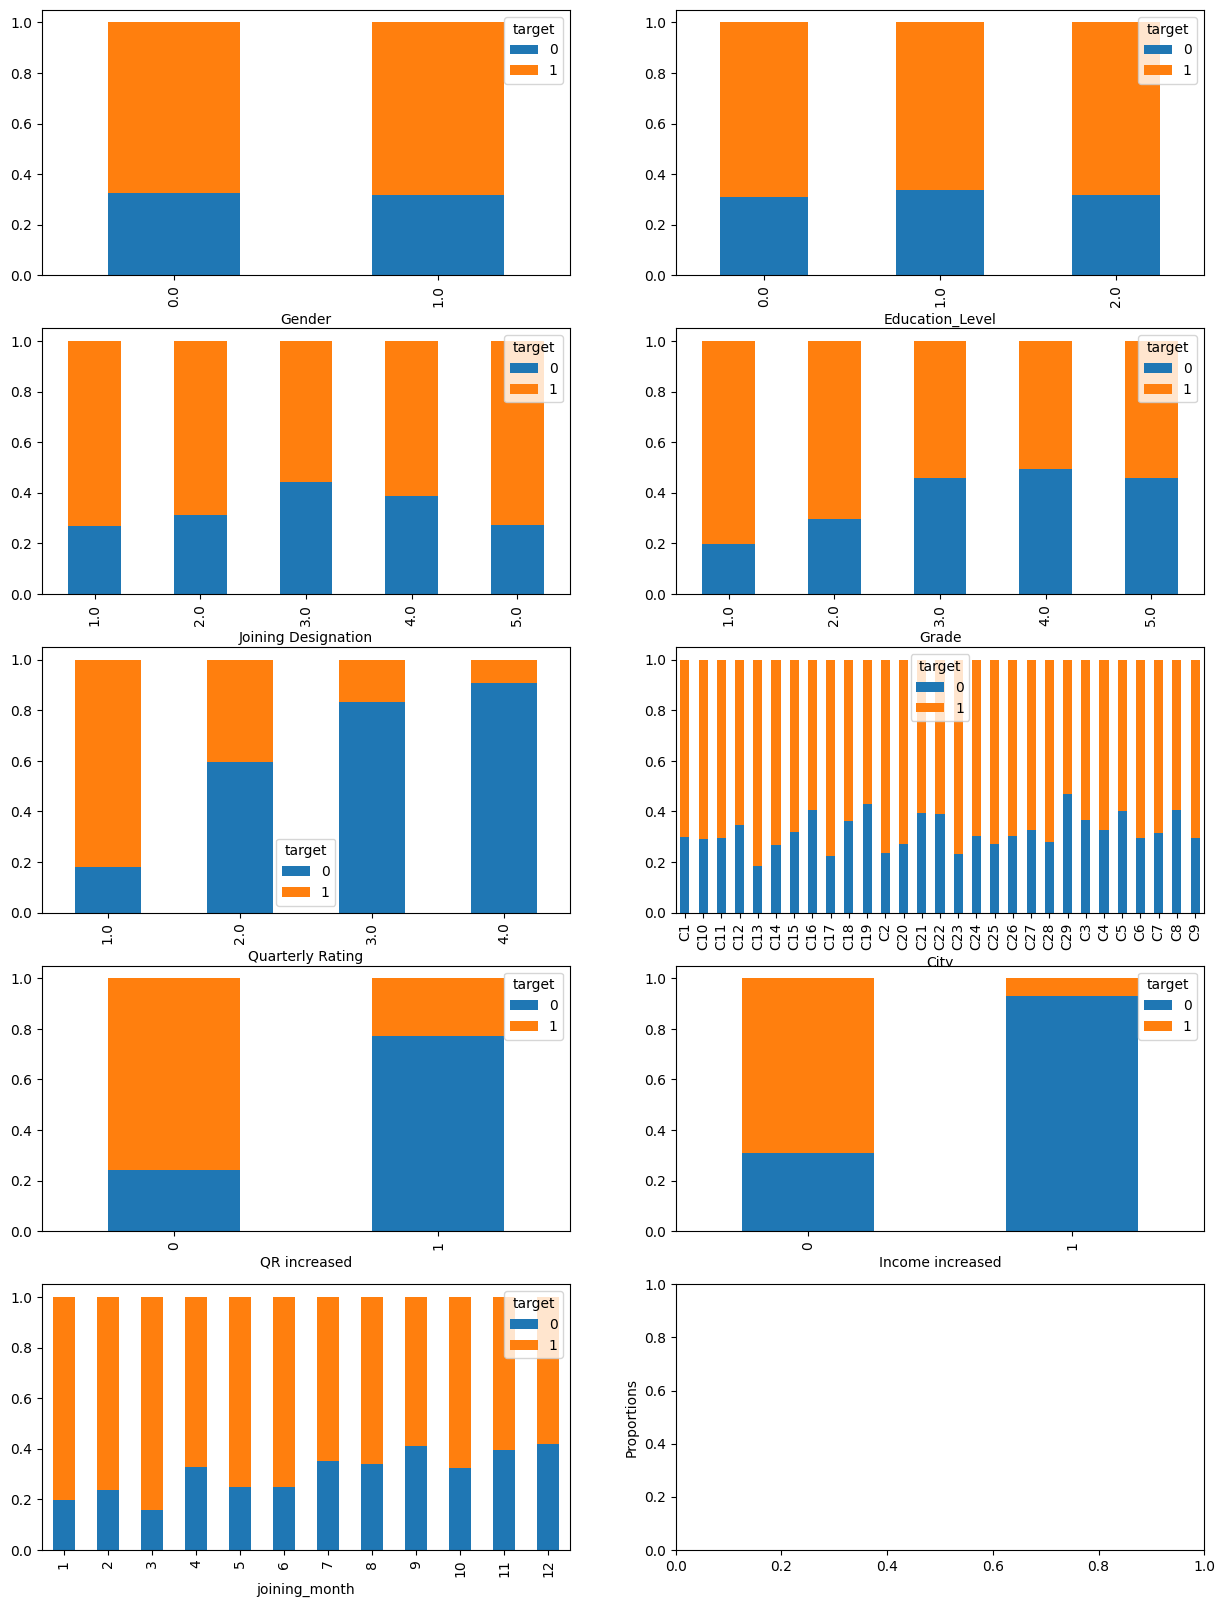

In [ ]:
figure, axes = plt.subplots(5,2, figsize=(15,20))

i=0
k=0
for j in cat:
  pd.crosstab(df2[j], df2['target'], normalize='index').plot(kind='bar', stacked=True, ax=axes[i//2,k] )
  i+=1
  if k==0:
    k=1
  else:
    k=0
  plt.ylabel('Proportions')

plt.show()

From the above graphs, we can see that proportions of target variables are uniform in various categories for categorical columns like gender and education level. Hence we will carry out chisquare test for these categorical variables.

In [ ]:
from scipy.stats import chi2_contingency

### Chisquare test

In [ ]:
#Function to do chisquare test for all categorical variables
#Input: dataframe, list of categorical variables, alpha
#Output: List of significant features, list of insignificant features

def chi2(df, cat, alpha=0.05):
  significant=[]
  insignificant=[]
  for i in cat:
    ct=pd.crosstab(df2[i], df2['target'])
    if np.any(ct<5):
      ct=ct[np.all(ct>5, axis=1)]
    stat, p_value, dof, exp = chi2_contingency(pd.crosstab(df2[i], df2['target']))
    if p_value<alpha:
      significant.append(i)
    else:
      insignificant.append(i)
  return significant, insignificant

In [ ]:
chi2(df2, cat)

(['Joining Designation',
  'Grade',
  'Quarterly Rating',
  'City',
  'QR increased',
  'Income increased',
  'joining_month'],
 ['Gender', 'Education_Level'])

In [ ]:
signi, insigni = chi2(df2, cat)
insigni

['Gender', 'Education_Level']

According to chisquare test, Gender and Education_Level are insignificant for the prediction of target variable. So we will go on and remove these features.

In [ ]:
df2.drop(insigni, axis=1, inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             2381 non-null   int64         
 1   Age                   2381 non-null   float64       
 2   Income                2381 non-null   float64       
 3   Joining Designation   2381 non-null   float64       
 4   Grade                 2381 non-null   float64       
 5   Total Business Value  2381 non-null   float64       
 6   Quarterly Rating      2381 non-null   float64       
 7   LastWorkingDate       1616 non-null   datetime64[ns]
 8   City                  2381 non-null   object        
 9   Dateofjoining         2381 non-null   datetime64[ns]
 10  QR increased          2381 non-null   int64         
 11  Income increased      2381 non-null   int64         
 12  joining_month         2381 non-null   int64         
 13  target            

## Removal of outliers from numerical columns

In [ ]:
#num_col = ['Age', 'Income', 'Total Business Value']

#df3 = df2.copy()

In [ ]:
#for i in num_col:
#  IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
#  lw = df[i].quantile(0.25)-1.5*IQR
#  hw = df[i].quantile(0.75)+1.5*IQR

#  df2 = df2[(df2[i]>lw) & (df2[i]<hw)]

#print('Number of data points before removing outliers =', df3.shape[0])
#print('Number of data points after removing outliers =', df2.shape[0])

## One hot encoding of categorical variables

In [ ]:
cat

['Gender',
 'Education_Level',
 'Joining Designation',
 'Grade',
 'Quarterly Rating',
 'City',
 'QR increased',
 'Income increased',
 'joining_month']

In [ ]:
cat.remove('Education_Level')
cat.remove('Gender')
for i in cat:
  print(i,':  ', df2[i].unique())

Joining Designation :   [1. 2. 3. 4. 5.]
Grade :   [1. 2. 3. 4. 5.]
Quarterly Rating :   [2. 1. 4. 3.]
City :   ['C23' 'C7' 'C13' 'C9' 'C11' 'C2' 'C19' 'C26' 'C20' 'C17' 'C29' 'C10'
 'C24' 'C14' 'C6' 'C28' 'C5' 'C18' 'C27' 'C15' 'C8' 'C25' 'C21' 'C1' 'C4'
 'C3' 'C16' 'C22' 'C12']
QR increased :   [0 1]
Income increased :   [0 1]
joining_month :   [12 11  1  7  9  6  5 10  3  8  4  2]


In [ ]:
#We will do one hot encoding for the columns Joining Designation , Quarterly Rating and Grade

df2 = pd.get_dummies(df2, columns = ['Joining Designation', 'Grade', 'Quarterly Rating'], drop_first=True)

In [ ]:
df2.head()

,Driver_ID,Age,Income,Total Business Value,LastWorkingDate,City,Dateofjoining,QR increased,Income increased,joining_month,...,Joining Designation_3.0,Joining Designation_4.0,Joining Designation_5.0,Grade_2.0,Grade_3.0,Grade_4.0,Grade_5.0,Quarterly Rating_2.0,Quarterly Rating_3.0,Quarterly Rating_4.0
0,1,28.0,57387.0,1715580.0,2019-03-11,C23,2018-12-24,0,0,12,...,0,0,0,0,0,0,0,1,0,0
1,2,31.0,67016.0,0.0,NaT,C7,2020-11-06,0,0,11,...,0,0,0,1,0,0,0,0,0,0
2,4,43.0,65603.0,350000.0,2020-04-27,C13,2019-12-07,0,0,12,...,0,0,0,1,0,0,0,0,0,0
3,5,29.0,46368.0,120360.0,2019-03-07,C9,2019-01-09,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,6,31.0,78728.0,1265000.0,NaT,C11,2020-07-31,1,0,7,...,1,0,0,0,1,0,0,1,0,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Driver_ID                2381 non-null   int64         
 1   Age                      2381 non-null   float64       
 2   Income                   2381 non-null   float64       
 3   Total Business Value     2381 non-null   float64       
 4   LastWorkingDate          1616 non-null   datetime64[ns]
 5   City                     2381 non-null   object        
 6   Dateofjoining            2381 non-null   datetime64[ns]
 7   QR increased             2381 non-null   int64         
 8   Income increased         2381 non-null   int64         
 9   joining_month            2381 non-null   int64         
 10  target                   2381 non-null   int64         
 11  Joining Designation_2.0  2381 non-null   uint8         
 12  Joining Designation_3.0  2381 non-

## Splitting of features and target

In [ ]:
df2.columns

Index(['Driver_ID', 'Age', 'Income', 'Total Business Value', 'LastWorkingDate',
       'City', 'Dateofjoining', 'QR increased', 'Income increased',
       'joining_month', 'target', 'Joining Designation_2.0',
       'Joining Designation_3.0', 'Joining Designation_4.0',
       'Joining Designation_5.0', 'Grade_2.0', 'Grade_3.0', 'Grade_4.0',
       'Grade_5.0', 'Quarterly Rating_2.0', 'Quarterly Rating_3.0',
       'Quarterly Rating_4.0'],
      dtype='object')

In [ ]:
X= df2.drop(['Driver_ID', 'Dateofjoining', 'target', 'LastWorkingDate'], axis=1)
y=df2['target']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state = 1069)

### Target Encoding of columns 'City' and 'joining_month'

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.4 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder

In [ ]:
te1 = TargetEncoder()
X_train['City'] = te1.fit_transform(X_train['City'], y_train)
X_test['City'] = te1.transform(X_test['City'])

In [ ]:
X['City'].nunique()

29

In [ ]:
X_train['City'].nunique(), X_test['City'].nunique()

(29, 29)

In [ ]:
X_train['joining_month']=X_train['joining_month'].astype('object')
X_test['joining_month']=X_test['joining_month'].astype('object')

In [ ]:
te2 = TargetEncoder()
X_train['joining_month'] = te2.fit_transform(X_train['joining_month'], y_train)
X_test['joining_month'] = te2.transform(X_test['joining_month'])

In [ ]:
X['joining_month'].nunique()

12

In [ ]:
X_train['joining_month'].nunique(), X_test['joining_month'].nunique()

(12, 12)

## Standardization using MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

cols = list(X_train.columns)
X_train = scaler.fit_transform(X_train)

X_train = pd.DataFrame(X_train, columns=cols)

In [ ]:
X_train

,Age,Income,Total Business Value,City,QR increased,Income increased,joining_month,Joining Designation_2.0,Joining Designation_3.0,Joining Designation_4.0,Joining Designation_5.0,Grade_2.0,Grade_3.0,Grade_4.0,Grade_5.0,Quarterly Rating_2.0,Quarterly Rating_3.0,Quarterly Rating_4.0
0,0.351351,0.704291,0.047037,0.434566,0.0,0.0,0.744419,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.135135,0.106011,0.014326,0.282129,0.0,0.0,0.815557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.189189,0.367696,0.041986,0.518927,0.0,0.0,0.016626,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.648649,0.218167,0.020329,0.567496,0.0,0.0,0.016626,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.108108,0.047830,0.014326,0.659869,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,0.243243,0.303139,0.030845,0.607686,0.0,0.0,0.815557,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1662,0.378378,0.156610,0.025902,0.498503,0.0,0.0,0.930171,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1663,0.324324,0.563091,0.101395,0.627253,0.0,0.0,0.016626,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1664,0.270270,0.893798,0.510804,0.368458,0.0,0.0,0.349944,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = cols)

In [ ]:
X_test

,Age,Income,Total Business Value,City,QR increased,Income increased,joining_month,Joining Designation_2.0,Joining Designation_3.0,Joining Designation_4.0,Joining Designation_5.0,Grade_2.0,Grade_3.0,Grade_4.0,Grade_5.0,Quarterly Rating_2.0,Quarterly Rating_3.0,Quarterly Rating_4.0
0,0.189189,0.239617,0.037737,0.356371,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.459459,0.414086,0.249976,0.498503,0.0,0.0,0.349944,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.189189,0.022924,0.025073,0.518927,0.0,0.0,0.349944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.270270,0.043462,0.014326,0.659869,0.0,0.0,0.709444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.135135,0.036922,0.032341,0.786508,0.0,0.0,0.349944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,0.351351,0.375616,0.166072,0.368458,1.0,0.0,0.385342,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
711,0.270270,0.428128,0.017436,0.786508,0.0,0.0,0.385124,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
712,0.432432,0.242279,0.274510,0.308924,0.0,0.0,0.214385,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
713,0.432432,0.332311,0.279771,0.000000,1.0,0.0,0.385124,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1666, 18), (715, 18), (1666,), (715,))

In [ ]:
y_train.value_counts()

1    1131
0     535
Name: target, dtype: int64

Since the data is having imbalance, we will use SMOTE to resample the train dataset

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state = 42)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
X_train_res.shape, y_train_res.shape

((2262, 18), (2262,))

In [ ]:
y_train_res.value_counts()

1    1131
0    1131
Name: target, dtype: int64

## Model training for various Ensemble techniques

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, KFold

In [ ]:
rf = RandomForestClassifier(random_state = 42, max_depth = 7, n_estimators=100)
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(rf, X_train_res, y_train_res, cv=kfold, scoring=['accuracy', 'precision', 'recall'], return_train_score=True)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f"Train accuracy= {cv_acc_results['train_accuracy'].mean()*100}, Validation accuracy= {cv_acc_results['test_accuracy'].mean()*100}")

Train accuracy= 84.86599923731553, Validation accuracy= 78.86729562200304


In [ ]:
print(f"Train recall= {cv_acc_results['train_recall'].mean()*100}, Validation recall= {cv_acc_results['test_recall'].mean()*100}")

Train recall= 92.75553456487191, Validation recall= 69.36849409620879


In [ ]:
print(f"Train precision= {cv_acc_results['train_precision'].mean()*100}, Validation precision= {cv_acc_results['test_precision'].mean()*100}")

Train precision= 80.09627715846204, Validation precision= 65.6376623275749


### Trade-off between precision and recall

High churn rate is a problem for any industry. In case of Ola, losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones. So it's important to identify the driver who have higher chance of leaving the organization. Hence it's important to reduce the false negatives as we don't want to miss any driver who has higher chance of leaving.

To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. So this means that taking care of false positives is also important.

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

Since we need to take care of both FN and FP we will go on and evaluate the model based on f1 score which is the harmonic mean of precision and recall scores.

f1_score= (2xPrecisionxRecall)/(Precision+Recall)

### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

In [ ]:
'''def out(grid, X_train_res, y_train_res, X_test, y_test):
  print('Best parameters, ', grid.best_params_)
  print('Cross validation f1 score, ', grid.best_score_)
  print('Train accuracy: ',grid.score(X_train_res, y_train_res), ', Test accuracy: ', grid.score(X_test, y_test))
  y_pred_train = grid.predict(X_train_res)
  y_pred_test = grid.predict(X_test)
  print('Train f1: ',f1_score(y_train_res, y_pred_train), ', Test f1: ', f1_score(y_test, y_pred_test))

SyntaxError: incomplete input (<ipython-input-107-2c28cee03212>, line 1)

In [ ]:
def out(grid, X_train_res, y_train_res, X_test, y_test):
  print('Best parameters, ', grid.best_params_)
  print('Cross validation f1 score, ', grid.best_score_)

  kfold=KFold(n_splits=5)
  para =grid.best_params_
  model = RandomForestClassifier(random_state = 420, n_estimators = para.get('n_estimators'), max_depth = para.get('max_depth'), criterion = para.get('criterion'), max_features = para.get('max_features'))
  cv_f1_results = cross_validate(model, X_train_res, y_train_res, cv = kfold, scoring='f1', return_train_score = True)

  print(f"Train f1= {cv_f1_results['train_score'].mean()*100}, Validation f1= {cv_f1_results['test_score'].mean()*100}")

In [ ]:
params = {'n_estimators':[50,75,100,150],
          'max_depth':[3,4,5],
          'criterion':['gini','entropy'],
          'max_features':[3,4,5]
          }

grid=GridSearchCV(estimator=RandomForestClassifier(random_state=420),
                  param_grid=params,
                  scoring='f1',
                  cv=3,
                  n_jobs=-1)

grid.fit(X_train_res, y_train_res)

out(grid, X_train_res, y_train_res, X_test, y_test)

Best parameters,  {'criterion': 'gini', 'max_depth': 5, 'max_features': 5, 'n_estimators': 50}
Cross validation f1 score,  0.8051336578602006
Train f1= 81.87696561371614, Validation f1= 66.6473472339417


In [ ]:
params = {'n_estimators':[40,45,50],
          'max_depth':[5,6,7],
          'criterion':['gini'],
          'max_features':[5,6,7]
          }

grid=GridSearchCV(estimator=RandomForestClassifier(random_state=420),
                  param_grid=params,
                  scoring='f1',
                  cv=3,
                  n_jobs=-1)

grid.fit(X_train_res, y_train_res)

out(grid, X_train_res, y_train_res, X_test, y_test)

Best parameters,  {'criterion': 'gini', 'max_depth': 7, 'max_features': 6, 'n_estimators': 50}
Cross validation f1 score,  0.823397885545225
Train f1= 86.87007389784188, Validation f1= 67.70088519241928


After several iterations...

In [ ]:
params = {'n_estimators':[98,100,102],
          'max_depth':[8],
          'criterion':['gini'],
          'max_features':[6]
          }

grid=GridSearchCV(estimator=RandomForestClassifier(random_state=420),
                  param_grid=params,
                  scoring='f1',
                  cv=3,
                  n_jobs=-1)

grid.fit(X_train_res, y_train_res)

out(grid, X_train_res, y_train_res, X_test, y_test)

Best parameters,  {'criterion': 'gini', 'max_depth': 8, 'max_features': 6, 'n_estimators': 102}
Cross validation f1 score,  0.8313678221200788
Train f1= 89.65385777079578, Validation f1= 68.15230404956377


Since the results for train data is starting to increase and those for test starting to decrease,  from now on if we further tune the parameters, the model will be overfot. So we will stop hyperparameter tuning here.

## Random Forest - Tuned

In [ ]:
#Model performance after hyperparameter tuning

rf = RandomForestClassifier(random_state=420, n_estimators = 102, max_features=6, max_depth=8, criterion='gini')

rf.fit(X_train_res, y_train_res)

print('Train accuracy: ',rf.score(X_train_res, y_train_res), ', Test accuracy: ', rf.score(X_test, y_test))
y_pred_train = rf.predict(X_train_res)
y_pred_test = rf.predict(X_test)
print('Train f1: ',f1_score(y_train_res, y_pred_train), ', Test f1: ', f1_score(y_test, y_pred_test))
print('Train recall: ',recall_score(y_train_res, y_pred_train), ', Test recall: ', recall_score(y_test, y_pred_test))
print('Train precision: ',precision_score(y_train_res, y_pred_train), ', Test precision: ', precision_score(y_test, y_pred_test))

Train accuracy:  0.887709991158267 , Test accuracy:  0.820979020979021
Train f1:  0.8933669185558354 , Test f1:  0.8688524590163935
Train recall:  0.9407603890362511 , Test recall:  0.8742268041237113
Train precision:  0.8505195843325339 , Test precision:  0.8635437881873728


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

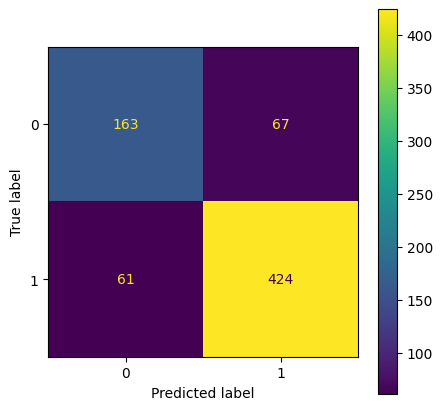

In [ ]:
cf = confusion_matrix(y_test, y_pred_test)
fig,ax=plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(cf).plot(ax=ax)
plt.show()

In [ ]:
y_test.value_counts()

1    485
0    230
Name: target, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       230
           1       0.86      0.87      0.87       485

    accuracy                           0.82       715
   macro avg       0.80      0.79      0.79       715
weighted avg       0.82      0.82      0.82       715



In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
probabilities = rf.predict_proba(X_test)
probability = probabilities[:,1]

In [ ]:
fpr, tpr, thr = roc_curve(y_test, probability)

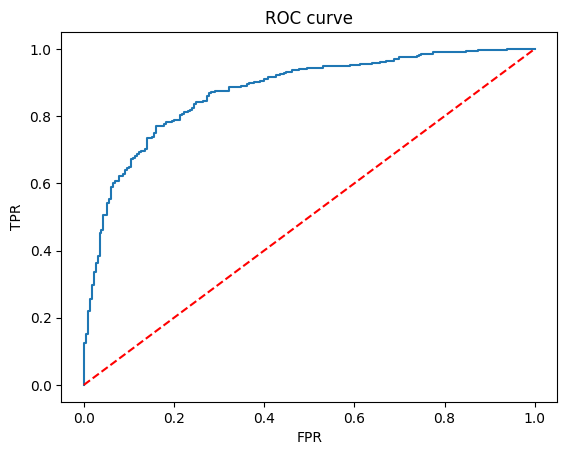

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)

plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
roc_auc_score(y_test, probability)

0.8730883012102196

The model is giving pretty good roc_auc_score of 0.873. Since there is an imbalance in the data we will check precision recall curve too.

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

In [ ]:
precision, recall, thr = precision_recall_curve(y_test, probability)

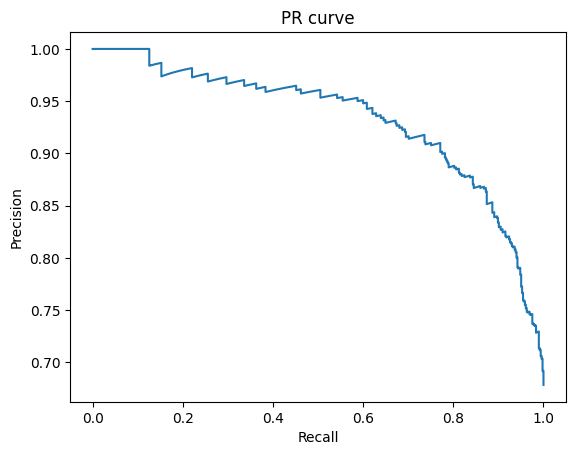

In [ ]:
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [ ]:
auc(recall, precision)

0.9322512038006004

The model is performing good and returned an auc score of 0.932 for precision-recall curve.

## xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(random_state = 420)

In [ ]:
xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=420, ...)

In [ ]:
y_pred_train = xgb.predict(X_train_res)
y_pred_test = xgb.predict(X_test)

print(f"Accuracy on train data : {xgb.score(X_train_res, y_train_res)}")
print(f"Accuracy on test data : {xgb.score(X_test, y_test)}")

Accuracy on train data : 0.9973474801061007
Accuracy on test data : 0.7972027972027972


In [ ]:
print(f"Precision score on train data : {precision_score(y_train_res, y_pred_train)}")
print(f"Precision score on test data : {precision_score(y_test, y_pred_test)}")

Precision score on train data : 0.9973474801061007
Precision score on test data : 0.8601694915254238


In [ ]:
print(f"Recall score on train data : {recall_score(y_train_res, y_pred_train)}")
print(f"Recall score on test data : {recall_score(y_test, y_pred_test)}")

Recall score on train data : 0.9973474801061007
Recall score on test data : 0.8371134020618557


In [ ]:
print(f"f1 score on train data : {f1_score(y_train_res, y_pred_train)}")
print(f"f1 score on test data : {f1_score(y_test, y_pred_test)}")

f1 score on train data : 0.9973474801061007
f1 score on test data : 0.8484848484848485


## Hyperparameter tuning

In [ ]:
from sklearn.model_selection import KFold, cross_validate, GridSearchCV

In [ ]:
def xgb_out(grid, X_train_res, y_train_res):
  print('Best parameters, ', grid.best_params_)
  print('Cross validation f1 score, ', grid.best_score_)

  kfold= KFold(n_splits=5)
  para = grid.best_params_
  model = XGBClassifier(random_state = 420, n_estimators = para.get('n_estimators'), max_depth = para.get('max_depth'), learning_rate = para.get('learning_rate'))
  cv_f1_results = cross_validate(model, X_train_res, y_train_res, cv = kfold, scoring='f1', return_train_score = True)

  print(f"Train f1= {cv_f1_results['train_score'].mean()*100}, Validation f1= {cv_f1_results['test_score'].mean()*100}")

In [ ]:
params={
    'n_estimators' : [10,15,20],
    'max_depth': [3,4,5],
    'learning_rate' : [0.1]
}

grid = GridSearchCV(XGBClassifier(random_state=420,),
                    param_grid=params,
                    scoring='f1',
                    cv=3,
                    n_jobs=-1)
grid.fit(X_train_res, y_train_res)
xgb_out(grid, X_train_res, y_train_res)

Best parameters,  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 20}
Cross validation f1 score,  0.8201822058158594
Train f1= 85.93926949639285, Validation f1= 66.80878510152272


In [ ]:
params={
    'n_estimators' : [20,30,40],
    'max_depth': [5,6,7],
    'learning_rate' : [0.1]
}

grid = GridSearchCV(XGBClassifier(random_state=420,),
                    param_grid=params,
                    scoring='f1',
                    cv=3,
                    n_jobs=-1)
grid.fit(X_train_res, y_train_res)
xgb_out(grid, X_train_res, y_train_res)

Best parameters,  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 40}
Cross validation f1 score,  0.8363637499063273
Train f1= 93.03510704923266, Validation f1= 68.62823687687751


After several iterations...

In [ ]:
params={
    'n_estimators' : [270,280,290],
    'max_depth': [7],
    'learning_rate' : [0.1]
}

grid = GridSearchCV(XGBClassifier(random_state=420,),
                    param_grid=params,
                    scoring='f1',
                    cv=3,
                    n_jobs=-1)
grid.fit(X_train_res, y_train_res)
xgb_out(grid, X_train_res, y_train_res)

Best parameters,  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 280}
Cross validation f1 score,  0.853854752526988
Train f1= 99.98231653404068, Validation f1= 69.90471400279542


## XGBClassifier - tuned

In [ ]:
xgb = XGBClassifier(n_estimators=280, max_depth=7, learning_rate = 0.1)
xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=280, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
print('Train accuracy: ',xgb.score(X_train_res, y_train_res), ', Test accuracy: ', xgb.score(X_test, y_test))
y_pred_train = xgb.predict(X_train_res)
y_pred_test = xgb.predict(X_test)
print('Train f1: ',f1_score(y_train_res, y_pred_train), ', Test f1: ', f1_score(y_test, y_pred_test))
print('Train recall: ',recall_score(y_train_res, y_pred_train), ', Test recall: ', recall_score(y_test, y_pred_test))
print('Train precision: ',precision_score(y_train_res, y_pred_train), ', Test precision: ', precision_score(y_test, y_pred_test))

Train accuracy:  0.9986737400530504 , Test accuracy:  0.8041958041958042
Train f1:  0.9986743261157754 , Test f1:  0.8541666666666666
Train recall:  0.9991158267020336 , Test recall:  0.845360824742268
Train precision:  0.9982332155477032 , Test precision:  0.8631578947368421


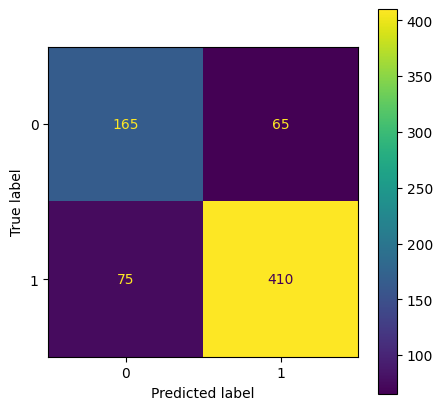

In [ ]:
cf = confusion_matrix(y_test, y_pred_test)
fig,ax=plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(cf).plot(ax=ax)
plt.show()

In [ ]:
y_test.value_counts()

1    485
0    230
Name: target, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70       230
           1       0.86      0.85      0.85       485

    accuracy                           0.80       715
   macro avg       0.78      0.78      0.78       715
weighted avg       0.81      0.80      0.81       715



In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

probabilities = xgb.predict_proba(X_test)
probability = probabilities[:,1]

fpr, tpr, thr = roc_curve(y_test, probability)

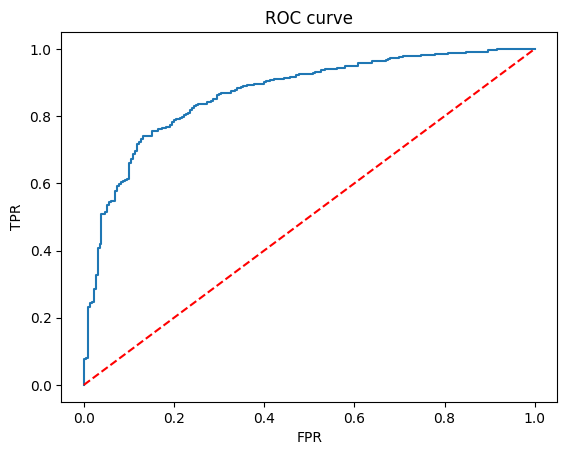

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)

plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
roc_auc_score(y_test, probability)

0.867942626624832

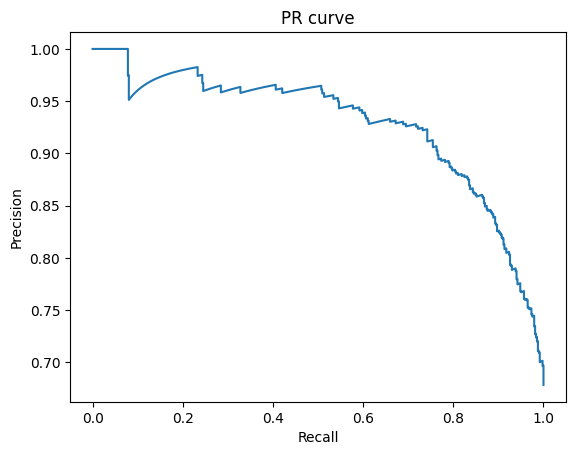

In [ ]:
precision, recall, thr = precision_recall_curve(y_test, probability)

plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [ ]:
auc(recall, precision)

0.9276072821532583

# Summary

Overall we are getting better results for RandomForest when compared with xgboost. So we can conclude with RandomForest and the parameters that we obtained after hyperparameter tuning.